### Start

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt; import seaborn as sns
if os.getcwd().endswith('testing'):
    os.chdir('..')

data1 = pd.read_csv('input_data/file1.csv')
data2 = pd.read_csv('input_data/file2.csv')

# print the data
print(data1.head())
print(data1.dtypes)

# print the data
print(data2.head())
print(data2.dtypes)

                  Date     Value
0  2024-01-01 00:00:00  1.461143
1  2024-01-01 01:00:00  1.355002
2  2024-01-01 02:00:00  1.520490
3  2024-01-01 03:00:00  1.693885
4  2024-01-01 04:00:00  1.406282
Date      object
Value    float64
dtype: object
                  Date     Value
0  2024-01-01 00:00:00  0.807420
1  2024-01-01 01:00:00  0.755258
2  2024-01-01 02:00:00  0.840624
3  2024-01-01 03:00:00  0.915459
4  2024-01-01 04:00:00  0.734758
Date      object
Value    float64
dtype: object


We have data for 366 days, 24 hours each day, no missing values.

In [4]:
366*24, data1.shape[0], data2.shape[0]

(8784, 8784, 8784)

In [7]:
print(data1.isnull().sum())
print(data2.isnull().sum())

Date     0
Value    0
dtype: int64
Date     0
Value    0
dtype: int64


But the second file has 0 values, about 3% of the data.

In [21]:
print((data1['Value'] == 0).sum())
print((data2['Value'] == 0).sum())

0
256


In [22]:
# calculate the percentage of 0s in data2
print((data2['Value'] == 0).sum()/data2['Value'].count())

0.029143897996357013


Let's see in more detail where those 0s occur
- By plotting the data, we can see that the zeros are mostly spread out in 2 sifferent clusters:
- One is for a period of 3 days without data.
- The other one is more sporadic, once every couple of days there are 0s in the period 9 to 16 o'clock	

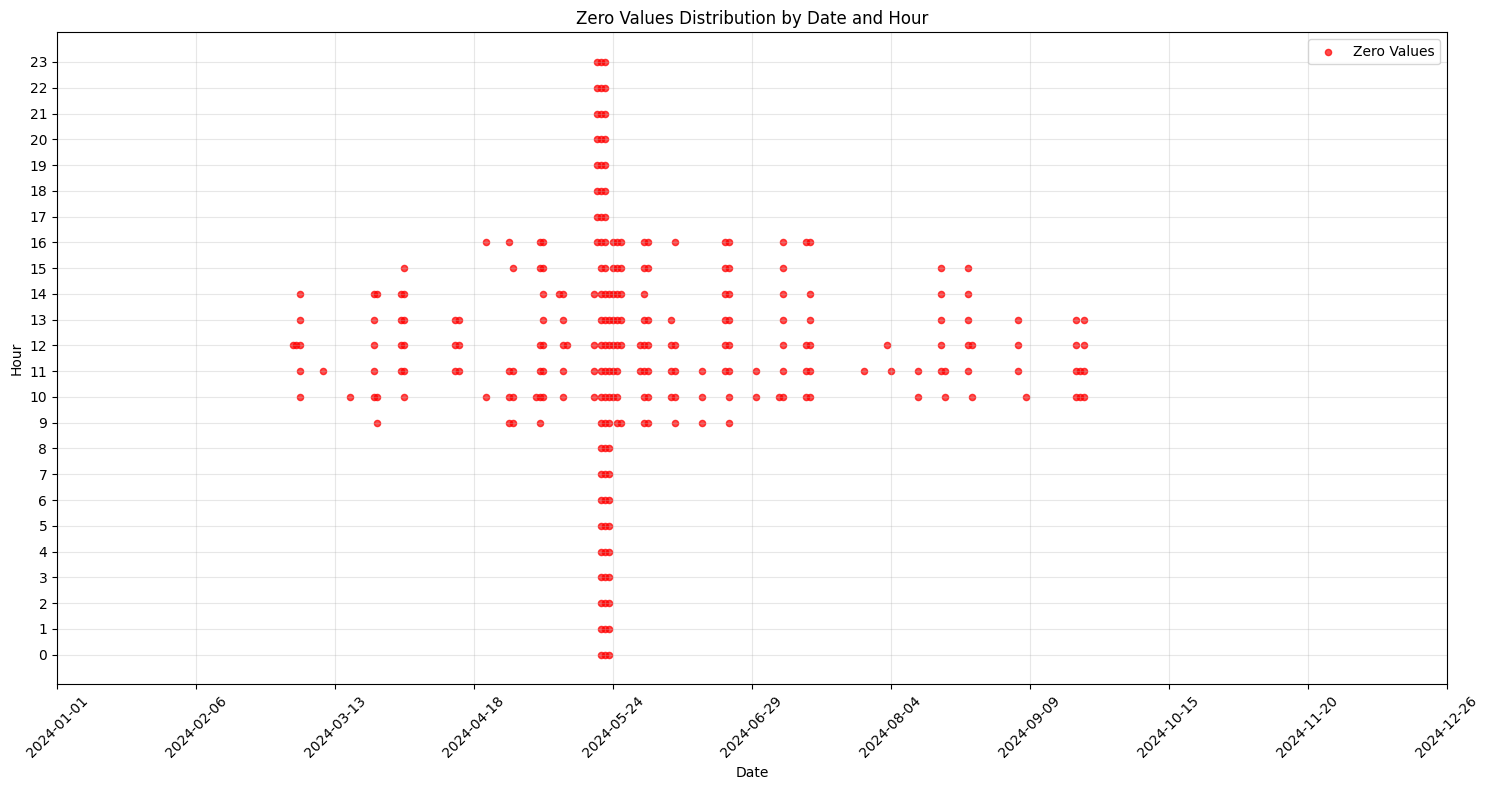

In [25]:
data2['Date'] = pd.to_datetime(data2['Date']); data2['Hour'] = data2['Date'].dt.hour; data2['DateOnly'] = data2['Date'].dt.date
zero_values = data2[data2['Value'] == 0]
fig, ax = plt.subplots(figsize=(15, 8))
unique_dates = sorted(data2['DateOnly'].unique()); unique_hours = sorted(data2['Hour'].unique())
date_to_x = {date: i for i, date in enumerate(unique_dates)}; hour_to_y = {hour: i for i, hour in enumerate(unique_hours)}
x_coords = [date_to_x[date] for date in zero_values['DateOnly']]; y_coords = [hour_to_y[hour] for hour in zero_values['Hour']]
ax.scatter(x_coords, y_coords, c='red', s=20, alpha=0.7, label='Zero Values')
ax.set_xlabel('Date'); ax.set_ylabel('Hour'); ax.set_title('Zero Values Distribution by Date and Hour')
ax.set_xticks(range(0, len(unique_dates), max(1, len(unique_dates)//10))); ax.set_xticklabels([str(unique_dates[i]) for i in range(0, len(unique_dates), max(1, len(unique_dates)//10))], rotation=45)
ax.set_yticks(range(len(unique_hours))); ax.set_yticklabels(unique_hours)
ax.grid(True, alpha=0.3); ax.legend(); plt.tight_layout(); plt.show()

DateOnly
2024-03-02     1
2024-03-03     1
2024-03-04     5
2024-03-10     1
2024-03-17     1
2024-03-23     5
2024-03-24     3
2024-03-30     4
2024-03-31     6
2024-04-13     3
2024-04-14     3
2024-04-21     2
2024-04-27     4
2024-04-28     4
2024-05-04     1
2024-05-05     6
2024-05-06     7
2024-05-10     1
2024-05-11     5
2024-05-12     1
2024-05-19     4
2024-05-20     8
2024-05-21    24
2024-05-22    24
2024-05-23    15
2024-05-24     7
2024-05-25     8
2024-05-26     6
2024-05-31     2
2024-06-01     8
2024-06-02     7
2024-06-08     4
2024-06-09     5
2024-06-16     3
2024-06-22     6
2024-06-23     8
2024-06-30     2
2024-07-06     1
2024-07-07     7
2024-07-13     4
2024-07-14     6
2024-07-28     1
2024-08-03     1
2024-08-04     1
2024-08-11     2
2024-08-17     5
2024-08-18     2
2024-08-24     5
2024-08-25     2
2024-09-06     3
2024-09-08     1
2024-09-21     4
2024-09-22     2
2024-09-23     4
dtype: int64


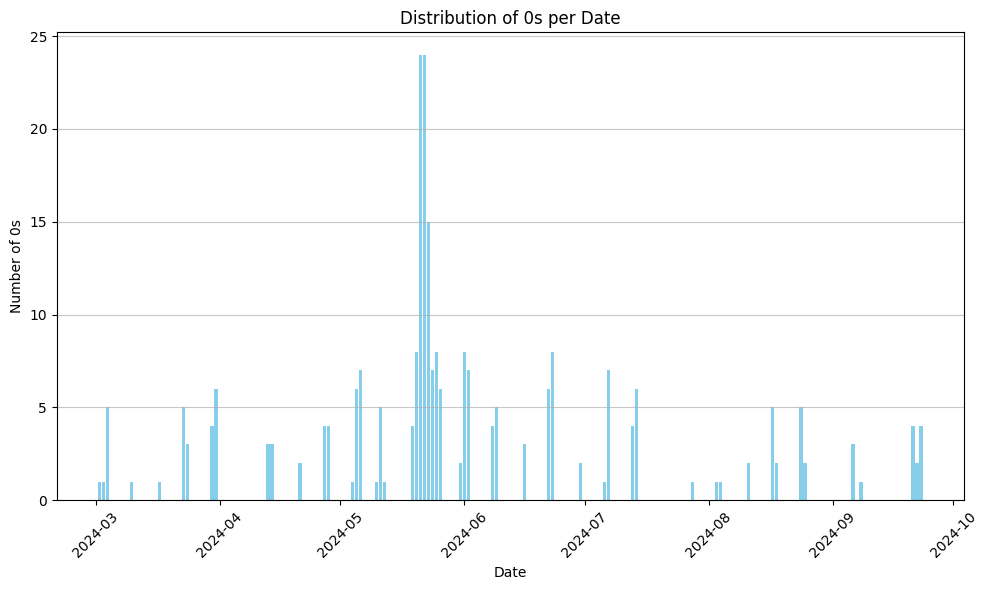

In [27]:
# Calculate the distribution of 0s per date. I.e. for each date, count the number of 0s
data2['Date'] = pd.to_datetime(data2['Date']); data2['Hour'] = data2['Date'].dt.hour; data2['DateOnly'] = data2['Date'].dt.date
zero_values = data2[data2['Value'] == 0]
zero_values_per_date = zero_values.groupby('DateOnly').size()
print(zero_values_per_date)

# Plot the distribution of 0s per date
plt.figure(figsize=(10, 6))
plt.bar(zero_values_per_date.index, zero_values_per_date.values, color='skyblue')
plt.xlabel('Date'); plt.ylabel('Number of 0s'); plt.title('Distribution of 0s per Date')
plt.xticks(rotation=45); plt.grid(axis='y', alpha=0.7)
plt.tight_layout(); plt.show()

We first see that there is a period between 2024-05-20 16:00:00 and 2024-05-23 14:00:00 where for 71 intervals in a row, the value is 0 (i.e. for almost 3 days). These dates are monday to thursday


In [ ]:

# Let's see which rows have the 0 values in data2
pd.set_option('display.max_rows', None)
df_temp = data2[
    (data2['Value'] == 0)
    & (data2['Date'] >= '2024-05-20')
    & (data2['Date'] < '2024-05-24')
]
print(df_temp.head(5)); print(df_temp.tail(5)); print(df_temp.shape)

                    Date  Value  Hour    DateOnly
3375 2024-05-20 16:00:00    0.0    16  2024-05-20
3376 2024-05-20 17:00:00    0.0    17  2024-05-20
3377 2024-05-20 18:00:00    0.0    18  2024-05-20
3378 2024-05-20 19:00:00    0.0    19  2024-05-20
3379 2024-05-20 20:00:00    0.0    20  2024-05-20
                    Date  Value  Hour    DateOnly
3441 2024-05-23 10:00:00    0.0    10  2024-05-23
3442 2024-05-23 11:00:00    0.0    11  2024-05-23
3443 2024-05-23 12:00:00    0.0    12  2024-05-23
3444 2024-05-23 13:00:00    0.0    13  2024-05-23
3445 2024-05-23 14:00:00    0.0    14  2024-05-23
(71, 4)


Here we see that the other missing values outside the above period are during working hours (9 to 16 o'clock) on the weekend, or more rarely on friday / monday. Also they occurin the period March to September. My hypothesis is that this is caused by more solar energy generated in the summer months around midday.

Zero values per day of week (excluding problematic period):
DayOfWeek
Friday      13
Monday      16
Saturday    69
Sunday      87
dtype: int64


/tmp/ipykernel_14360/367157255.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2_filtered['DayOfWeek'] = data2_filtered['Date'].dt.day_name()


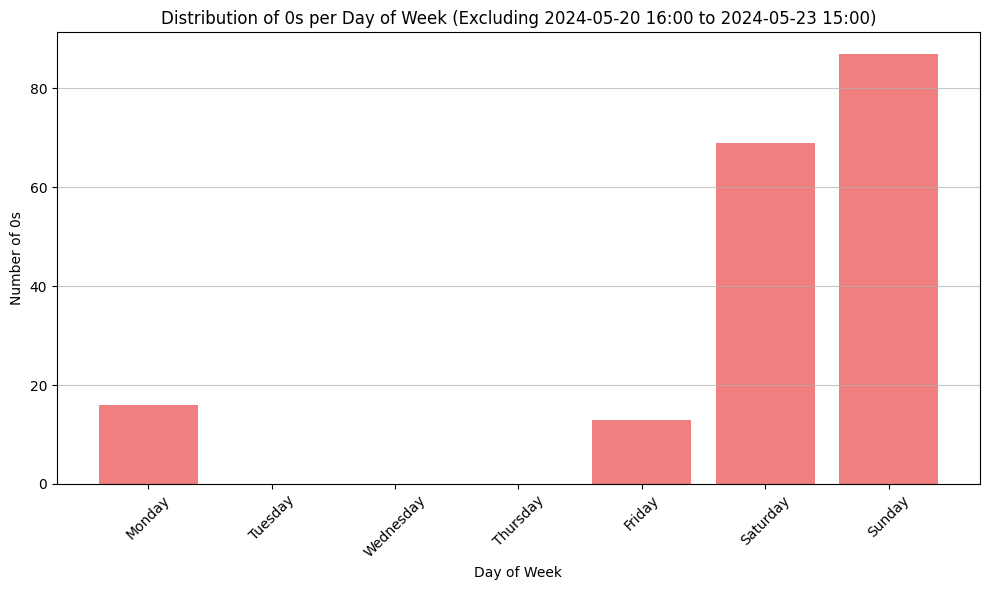

In [38]:
# then we look at day of week grouping
# Group by day of week and count 0s, excluding the problematic period
data2_filtered = data2[~((data2['Date'] >= '2024-05-20 16:00:00') & (data2['Date'] < '2024-05-23 15:00:00'))]
data2_filtered['DayOfWeek'] = data2_filtered['Date'].dt.day_name()
zero_values_filtered = data2_filtered[data2_filtered['Value'] == 0]
zero_values_per_dow = zero_values_filtered.groupby('DayOfWeek').size()
print("Zero values per day of week (excluding problematic period):")
print(zero_values_per_dow)

# Plot the distribution of 0s per day of week
plt.figure(figsize=(10, 6))
dow_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
zero_values_per_dow_ordered = zero_values_per_dow.reindex(dow_order, fill_value=0)
plt.bar(zero_values_per_dow_ordered.index, zero_values_per_dow_ordered.values, color='lightcoral')
plt.xlabel('Day of Week'); plt.ylabel('Number of 0s'); plt.title('Distribution of 0s per Day of Week (Excluding 2024-05-20 16:00 to 2024-05-23 15:00)')
plt.xticks(rotation=45); plt.grid(axis='y', alpha=0.7)
plt.tight_layout(); plt.show()


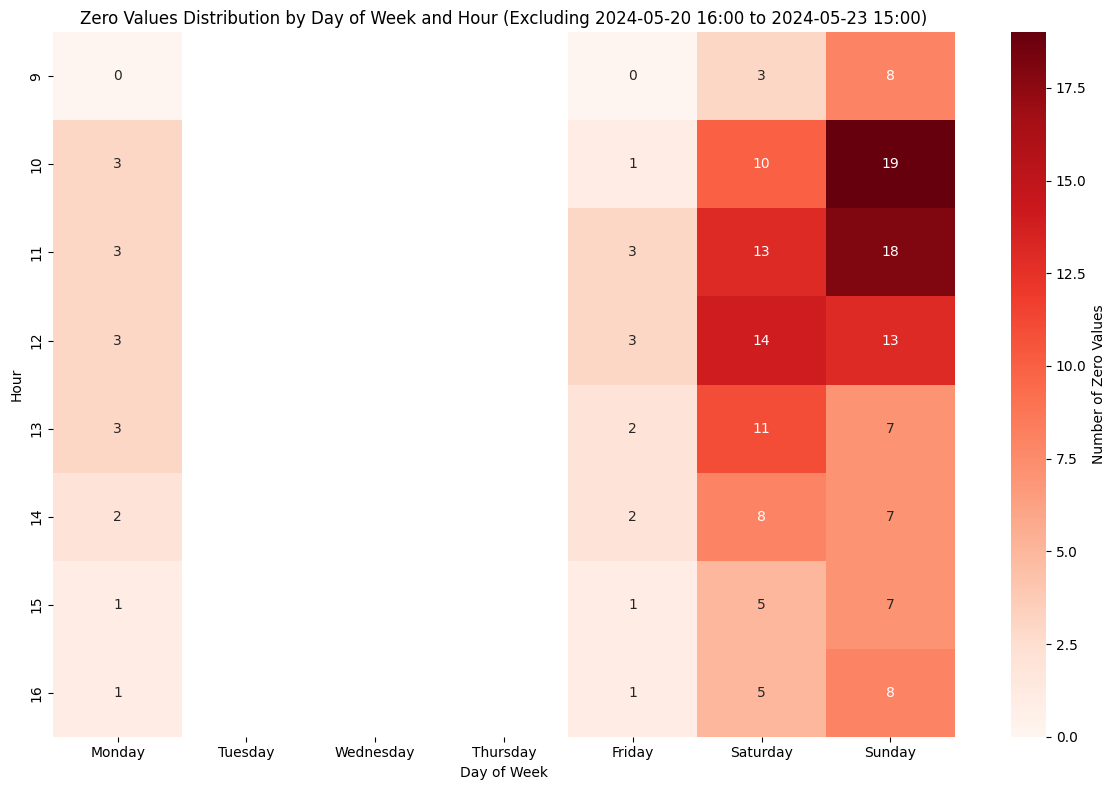

Zero values per day of week and hour (excluding problematic period):
DayOfWeek
Monday       16
Tuesday       0
Wednesday     0
Thursday      0
Friday       13
Saturday     69
Sunday       87
Name: ZeroCount, dtype: int64

Total zero values (filtered): 185


In [39]:
# Group by day of week and hour, count 0s, excluding the problematic period
zero_values_per_dow_hour = zero_values_filtered.groupby(['DayOfWeek', 'Hour']).size().reset_index(name='ZeroCount')
zero_values_pivot = zero_values_per_dow_hour.pivot(index='Hour', columns='DayOfWeek', values='ZeroCount').fillna(0)
zero_values_pivot = zero_values_pivot.reindex(columns=dow_order)

# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(zero_values_pivot, annot=True, fmt='g', cmap='Reds', cbar_kws={'label': 'Number of Zero Values'})
plt.title('Zero Values Distribution by Day of Week and Hour (Excluding 2024-05-20 16:00 to 2024-05-23 15:00)')
plt.xlabel('Day of Week'); plt.ylabel('Hour'); plt.tight_layout(); plt.show()

# Show summary statistics
print("Zero values per day of week and hour (excluding problematic period):")
print(zero_values_per_dow_hour.groupby('DayOfWeek')['ZeroCount'].sum().reindex(dow_order, fill_value=0))
print(f"\nTotal zero values (filtered): {zero_values_per_dow_hour['ZeroCount'].sum()}")


Let's see the distribution of values in data1 and data2

First zero occurrence: 2024-03-02 12:00:00
Last zero occurrence: 2024-09-23 13:00:00


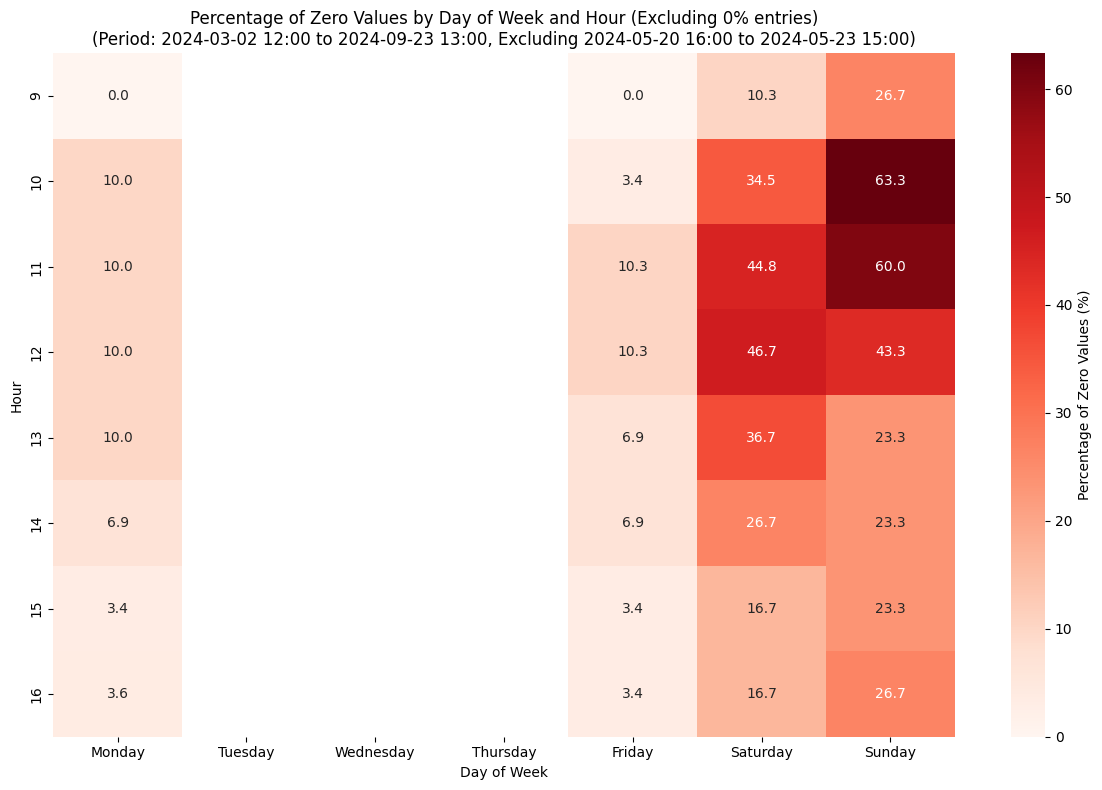

Percentage of zero values per day of week (during zero period, excluding problematic period):
Monday: 2.3%
Tuesday: 0.0%
Wednesday: 0.0%
Thursday: 0.0%
Friday: 1.9%
Saturday: 9.7%
Sunday: 12.1%

Overall zero percentage (during zero period, excluding problematic period): 3.8%
Total observations in filtered zero period: 4850
Hours with non-zero percentages shown in heatmap: 8


In [ ]:

zero_dates = data2[data2['Value'] == 0]['Date']
first_zero = zero_dates.min()
last_zero = zero_dates.max()
print(f"First zero occurrence: {first_zero}")
print(f"Last zero occurrence: {last_zero}")

data2_zero_period = data2[(data2['Date'] >= first_zero) & (data2['Date'] <= last_zero)]
data2_zero_period = data2_zero_period[~((data2_zero_period['Date'] >= '2024-05-20 16:00:00') & (data2_zero_period['Date'] < '2024-05-23 15:00:00'))]
data2_zero_period = data2_zero_period.copy()
data2_zero_period['DayOfWeek'] = data2_zero_period['Date'].dt.day_name()
data2_zero_period['Hour'] = data2_zero_period['Date'].dt.hour

zero_counts = data2_zero_period[data2_zero_period['Value'] == 0].groupby(['DayOfWeek', 'Hour']).size().reset_index(name='ZeroCount')
total_counts = data2_zero_period.groupby(['DayOfWeek', 'Hour']).size().reset_index(name='TotalCount')
zero_percentage_data = total_counts.merge(zero_counts, on=['DayOfWeek', 'Hour'], how='left')
zero_percentage_data['ZeroCount'] = zero_percentage_data['ZeroCount'].fillna(0)
zero_percentage_data['ZeroPercentage'] = (zero_percentage_data['ZeroCount'] / zero_percentage_data['TotalCount']) * 100
zero_percentage_data_filtered = zero_percentage_data[zero_percentage_data['ZeroPercentage'] > 0]
zero_percentage_pivot = zero_percentage_data_filtered.pivot(index='Hour', columns='DayOfWeek', values='ZeroPercentage').fillna(0)
dow_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
zero_percentage_pivot = zero_percentage_pivot.reindex(columns=dow_order)

plt.figure(figsize=(12, 8))
sns.heatmap(zero_percentage_pivot, annot=True, fmt='.1f', cmap='Reds', cbar_kws={'label': 'Percentage of Zero Values (%)'})
plt.title(f'Percentage of Zero Values by Day of Week and Hour (Excluding 0% entries)\n(Period: {first_zero.strftime("%Y-%m-%d %H:%M")} to {last_zero.strftime("%Y-%m-%d %H:%M")}, Excluding 2024-05-20 16:00 to 2024-05-23 15:00)')
plt.xlabel('Day of Week'); plt.ylabel('Hour'); plt.tight_layout(); plt.show()

print("Percentage of zero values per day of week (during zero period, excluding problematic period):")
dow_summary = zero_percentage_data.groupby('DayOfWeek').agg({'ZeroCount': 'sum', 'TotalCount': 'sum'}).reset_index()
dow_summary['ZeroPercentage'] = (dow_summary['ZeroCount'] / dow_summary['TotalCount']) * 100
dow_summary_ordered = dow_summary.set_index('DayOfWeek').reindex(dow_order).fillna(0)
for dow in dow_order:
    if dow in dow_summary_ordered.index:
        print(f"{dow}: {dow_summary_ordered.loc[dow, 'ZeroPercentage']:.1f}%")

total_zeros_period = zero_percentage_data['ZeroCount'].sum()
total_observations_period = zero_percentage_data['TotalCount'].sum()
print(f"\nOverall zero percentage (during zero period, excluding problematic period): {(total_zeros_period/total_observations_period)*100:.1f}%")
print(f"Total observations in filtered zero period: {total_observations_period}")
print(f"Hours with non-zero percentages shown in heatmap: {len(zero_percentage_pivot.index)}")




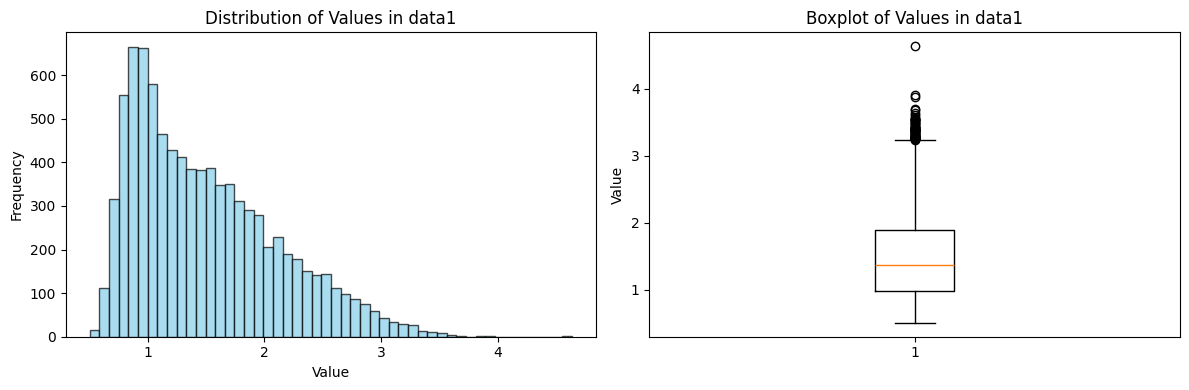

data1 Value stats: min=0.50, max=4.64, mean=1.50, std=0.62


In [ ]:
# plot the distribution of values of column "Value" in data1
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1); plt.hist(data1['Value'], bins=50, alpha=0.7, color='skyblue', edgecolor='black'); plt.title('Distribution of Values in data1'); plt.xlabel('Value'); plt.ylabel('Frequency')
plt.subplot(1, 2, 2); plt.boxplot(data1['Value']); plt.title('Boxplot of Values in data1'); plt.ylabel('Value')
plt.tight_layout(); plt.show()
print(f"data1 Value stats: min={data1['Value'].min():.2f}, max={data1['Value'].max():.2f}, mean={data1['Value'].mean():.2f}, std={data1['Value'].std():.2f}")


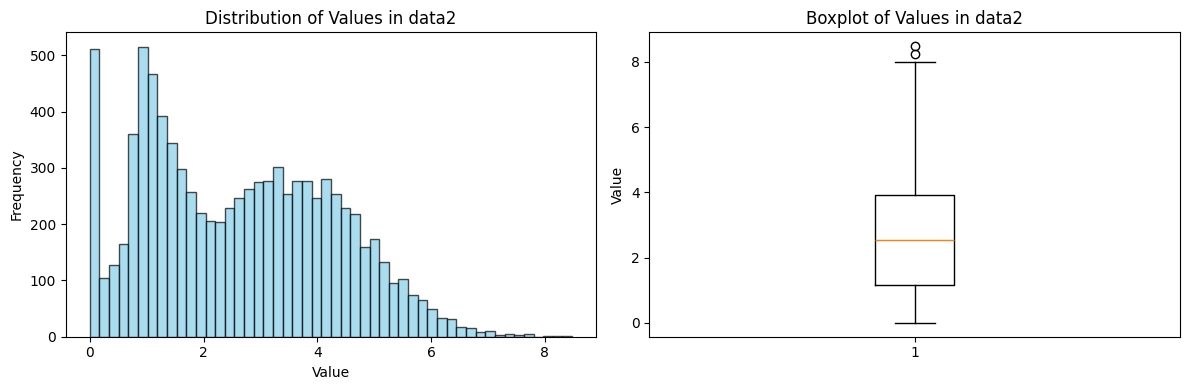

data2 Value stats: min=0.00, max=8.48, mean=2.62, std=1.65


In [14]:
# plot the distribution of values of column "Value" in data2
import matplotlib.pyplot as plt; import seaborn as sns
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1); plt.hist(data2['Value'], bins=50, alpha=0.7, color='skyblue', edgecolor='black'); plt.title('Distribution of Values in data2'); plt.xlabel('Value'); plt.ylabel('Frequency')
plt.subplot(1, 2, 2); plt.boxplot(data2['Value']); plt.title('Boxplot of Values in data2'); plt.ylabel('Value')
plt.tight_layout(); plt.show()
print(f"data2 Value stats: min={data2['Value'].min():.2f}, max={data2['Value'].max():.2f}, mean={data2['Value'].mean():.2f}, std={data2['Value'].std():.2f}")


Some potential issues that I see with this data is that we have information only for 1 year with a yearly cyclical pattern. This makes it very hard to evaluate a model, as I would have to evaluate on a period before the cycle ends (for example on December, although the model has never seen December data)